In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [2]:
df = pd.read_csv('./1.8_phones.csv')

In [3]:
df

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
...,...,...,...,...
95,512,iOS,8398,2011
96,64,Android,7197,2016
97,32,Android,5694,2014
98,32,Android,7589,2016


Для построения линейной регрессии пусть Andrroid = 0, IOS = 1

In [4]:
def os_val(x):
    if x == 'Android':
        return 0
    else:
        return 1


In [5]:
df['os'] = df['os'].apply(os_val)

In [6]:
df

,disk,os,price,year
0,64,0,7256,2016
1,128,0,7623,2015
2,64,0,1916,2010
3,512,1,15045,2017
4,16,0,4478,2013
...,...,...,...,...
95,512,1,8398,2011
96,64,0,7197,2016
97,32,0,5694,2014
98,32,0,7589,2016


In [7]:
X = df[['disk', 'year']]
y = df['price']
reg = LinearRegression().fit(X, y)

In [8]:
reg.predict(X[2:3])[0]

1720.3897027140483

In [9]:
d1, d2 = [], []
for x in np.linspace(min(df['disk']), max(df['disk']), 100):
    for y in np.linspace(min(df['year']), max(df['year']), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis = 1))

In [10]:
len(p)

10000

In [11]:
d1.ravel()

array([ 16.,  16.,  16., ..., 512., 512., 512.])

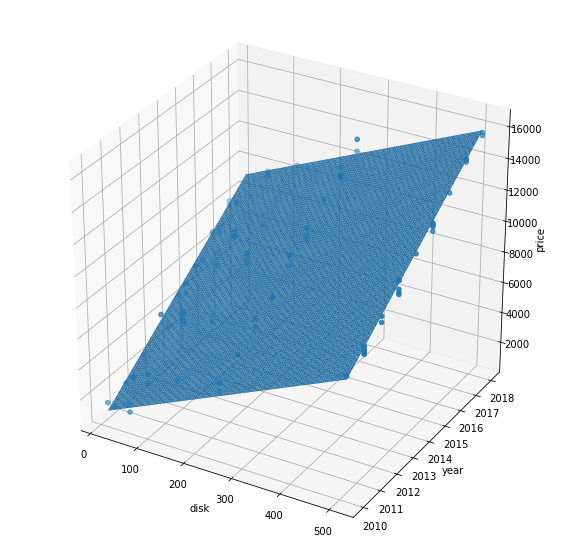

In [27]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
ax.scatter(df['disk'], df['year'], df['price'])

ax.set_xlabel('disk')
ax.set_ylabel('year')
ax.set_zlabel('price')
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel())

In [13]:
def reverse_os_val(x):
    if x == 0:
        return 'Android'
    else:
        return 'IOS'

In [14]:
df['os'] = df['os'].apply(reverse_os_val)
df

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,IOS,15045,2017
4,16,Android,4478,2013
...,...,...,...,...
95,512,IOS,8398,2011
96,64,Android,7197,2016
97,32,Android,5694,2014
98,32,Android,7589,2016


In [15]:
X = df[['disk', 'price', 'year']]
y = df['os']
clas = DecisionTreeClassifier().fit(X, y)

Text(0.5, 0, 'price')

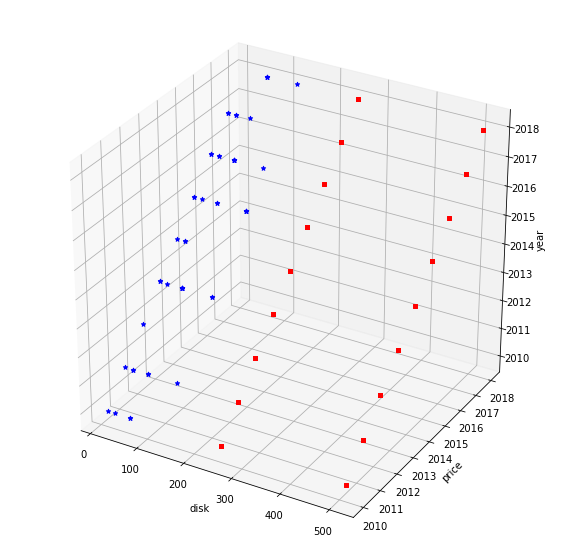

In [16]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')


for x in df.index:
    if clas.predict(X)[x] == 'Android':
        ax.scatter(df['disk'].iloc[x], df['year'].iloc[x], df['year'].iloc[x], c = 'b', marker = '*')

    elif clas.predict(X)[x] == 'IOS':
        ax.scatter(df['disk'].iloc[x], df['year'].iloc[x], df['year'].iloc[x], c = 'r', marker = 's')
        
ax.set_xlabel('disk')
ax.set_zlabel('year', rotation = 90)
ax.set_ylabel('price')

In [17]:
df['os'] = df['os'].apply(os_val)

In [18]:
X = df[['disk', 'os', 'year']]
clus = KMeans(n_clusters = 3).fit(X)

In [19]:
[c1, c2, c3] = clus.cluster_centers_ 

Text(0.5, 0, 'year')

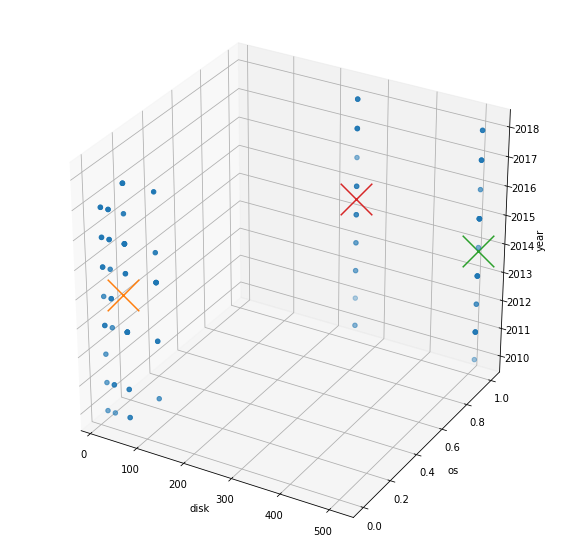

In [20]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
ax.scatter(df['disk'], df['os'], df['year'])

ax.scatter(c1[0], c1[1], c1[2], marker = 'x', s = 1000)
ax.scatter(c2[0], c2[1], c2[2], marker = 'x', s = 1000)
ax.scatter(c3[0], c3[1], c3[2], marker = 'x', s = 1000)
ax.set_xlabel('disk')
ax.set_ylabel('os')
ax.set_zlabel('year', rotation = 90)